<a href="https://colab.research.google.com/github/iliruslanili/data_analysis_algorithms/blob/hw1/data_analysis_algorithm_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm
from tqdm.notebook import trange

Функция, которую необходимо оптимизировать:<br>$2x*sin^2\frac{1}{2}x+1$

In [2]:
def func(x):
    return (x**2) * (np.sin(0.5 * x) ** 2 + 1)

Градиент функции одной переменной (х) в нашем случае это первая производная.<br> Производная (градиент) от функции $2x*sin^2\frac{1}{2}x+1$ равна $2x*sin^2\frac{1}{2}x+x^2sin\frac{1}{2}x cos\frac{1}{2}x$

In [3]:
def gradient(x):
    return 2 * x * np.sin(0.5 * x) ** 2 + x ** 2 * np.sin(0.5 * x) * np.cos(0.5 * x)

Применим чуточку ООП, хотя можно обойтись и без него<br>
Следующее значение x0 вычисляется по следующей формуле:<br>
$x=x_0-lr*\nabla f(x)$, где <br>$\nabla f(x)$ - градиент функции f(x),<br> $lr$ - скорость обучения (шаг)

In [4]:
class optimizer:
    def __init__(self, f=func, grad_func=gradient):
        self.func = f
        self.gradient = grad_func
    
    def optimize(self, iters=100, x0=0, lr=1e-4):
        for iter in range(1, iters + 1):
            grad = self.gradient(x0)
            x0 -= lr * grad

            # if x0 == np.nan:
            #     return None

        return x0

Построим график функции

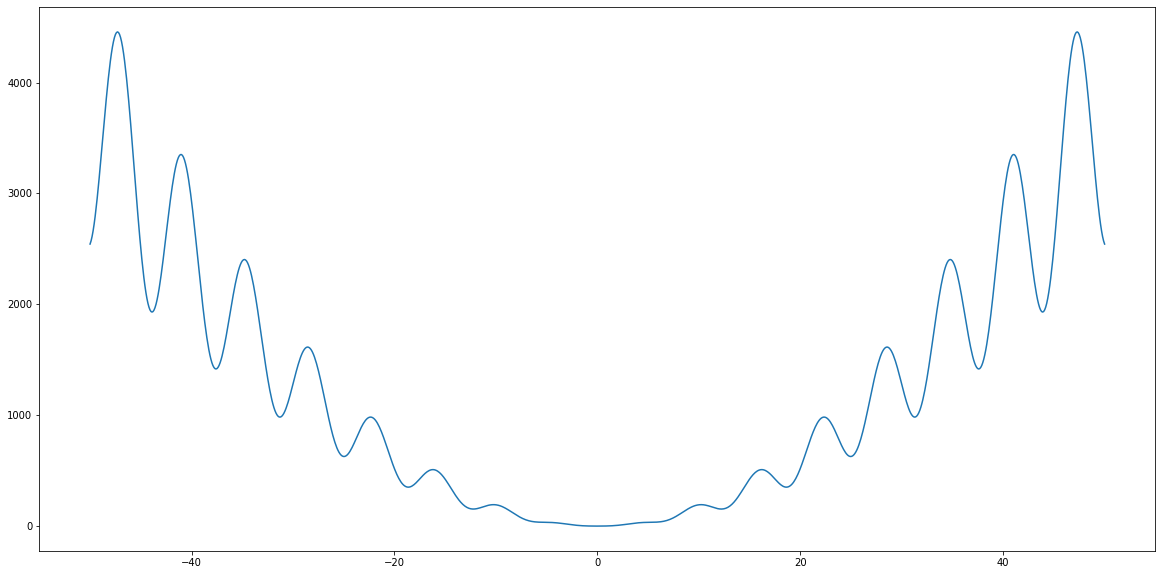

In [5]:
x = np.linspace(-50, 50, 1000)
plt.figure(figsize=(20, 10))
plt.plot(x, func(x))

Постоим графики оптимизации для разных скоростей и начальных значений<br>
Иногда на высоких скоростях оптимизация расходится

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sin
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in cos
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sin
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in cos
  


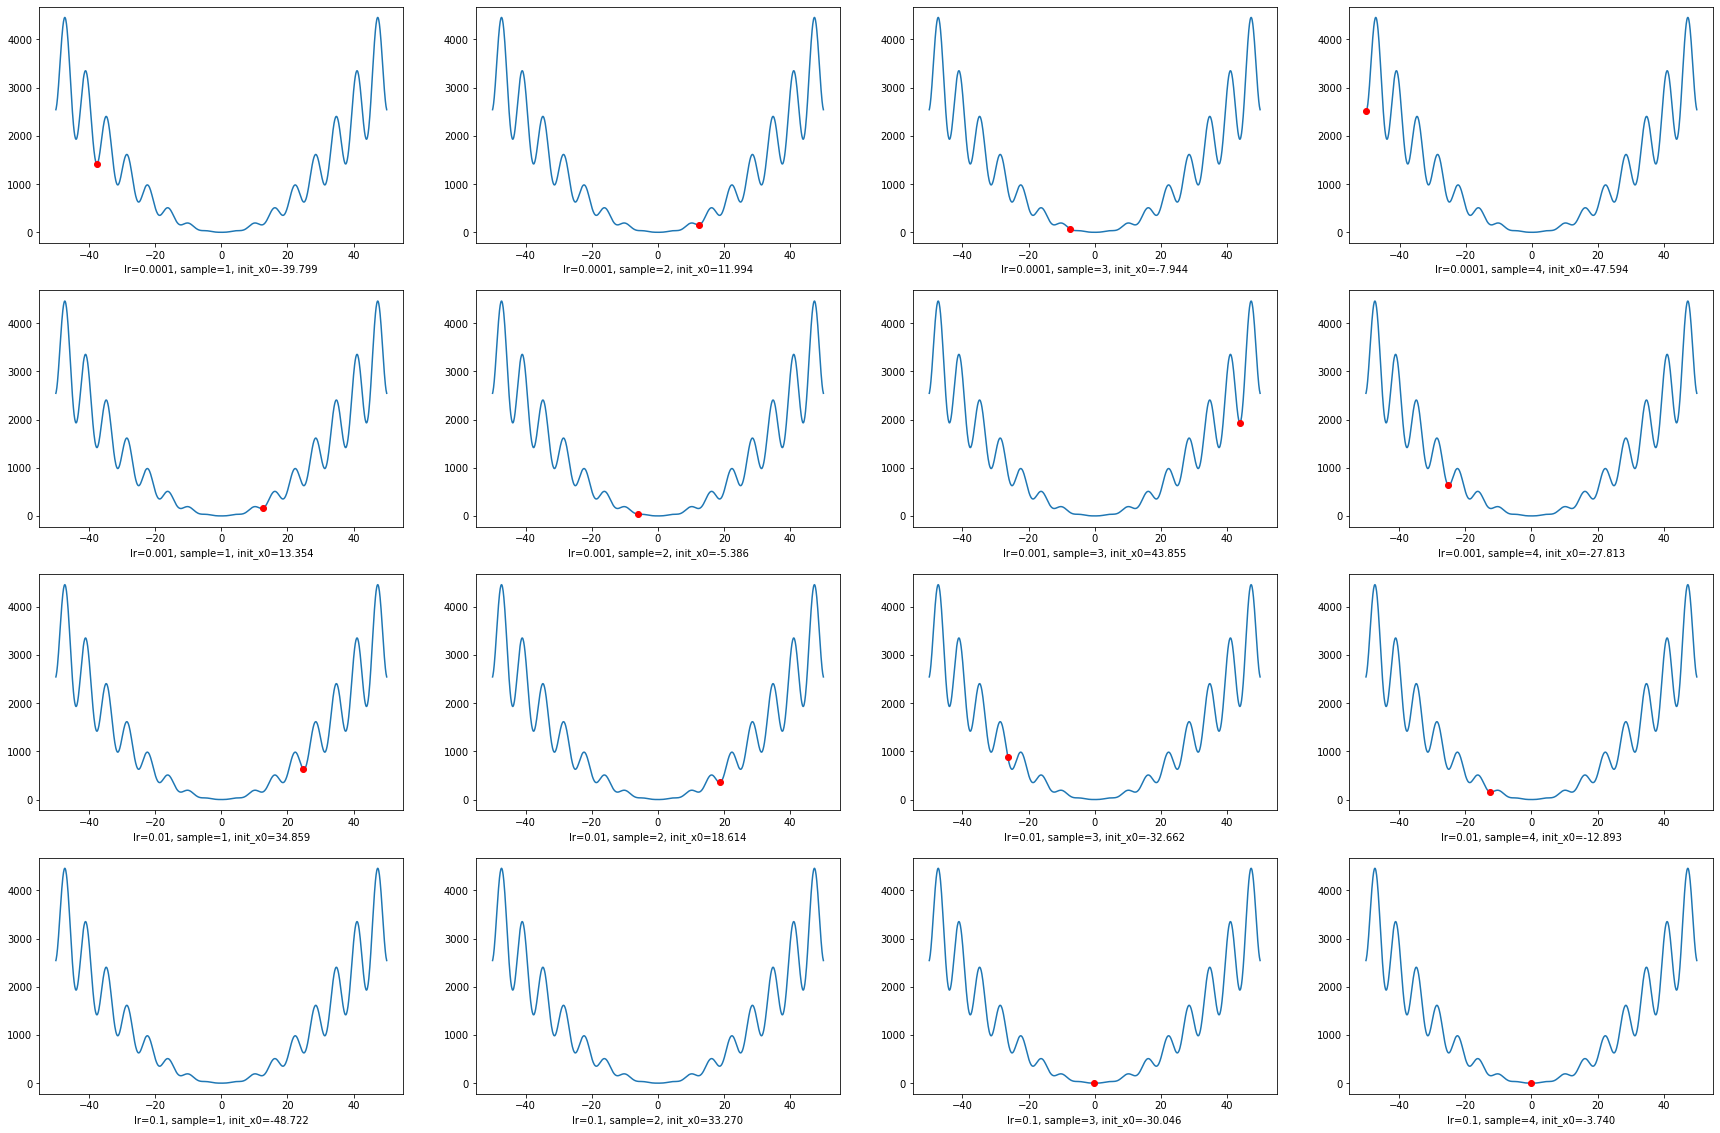

In [8]:
from numpy.random.mtrand import seed
iters = 100
lr = 1e-1

opt = optimizer(f=func, grad_func=gradient)

fig = plt.figure(figsize=(30, 20))
# plt.plot(x, func(x))

counter = 1
for lr in [1e-4, 1e-3, 1e-2, 1e-1]:
    for sample in range(1, 5):
        np.random.seed=1234
        init_x0 = np.random.uniform(-50, 50)
        x0 = opt.optimize(iters=iters, lr=lr, x0=init_x0)

        ax = fig.add_subplot(4, 4, counter)
        ax.plot(x, func(x))
        ax.plot(x0, func(x0), 'ro')
        ax.set_xlabel(f'lr={lr}, sample={sample}, init_x0={init_x0:.3f}')
        
        counter += 1

Более-менее приемлемо получается на скорости 0.05
100 итераций вполне достаточно

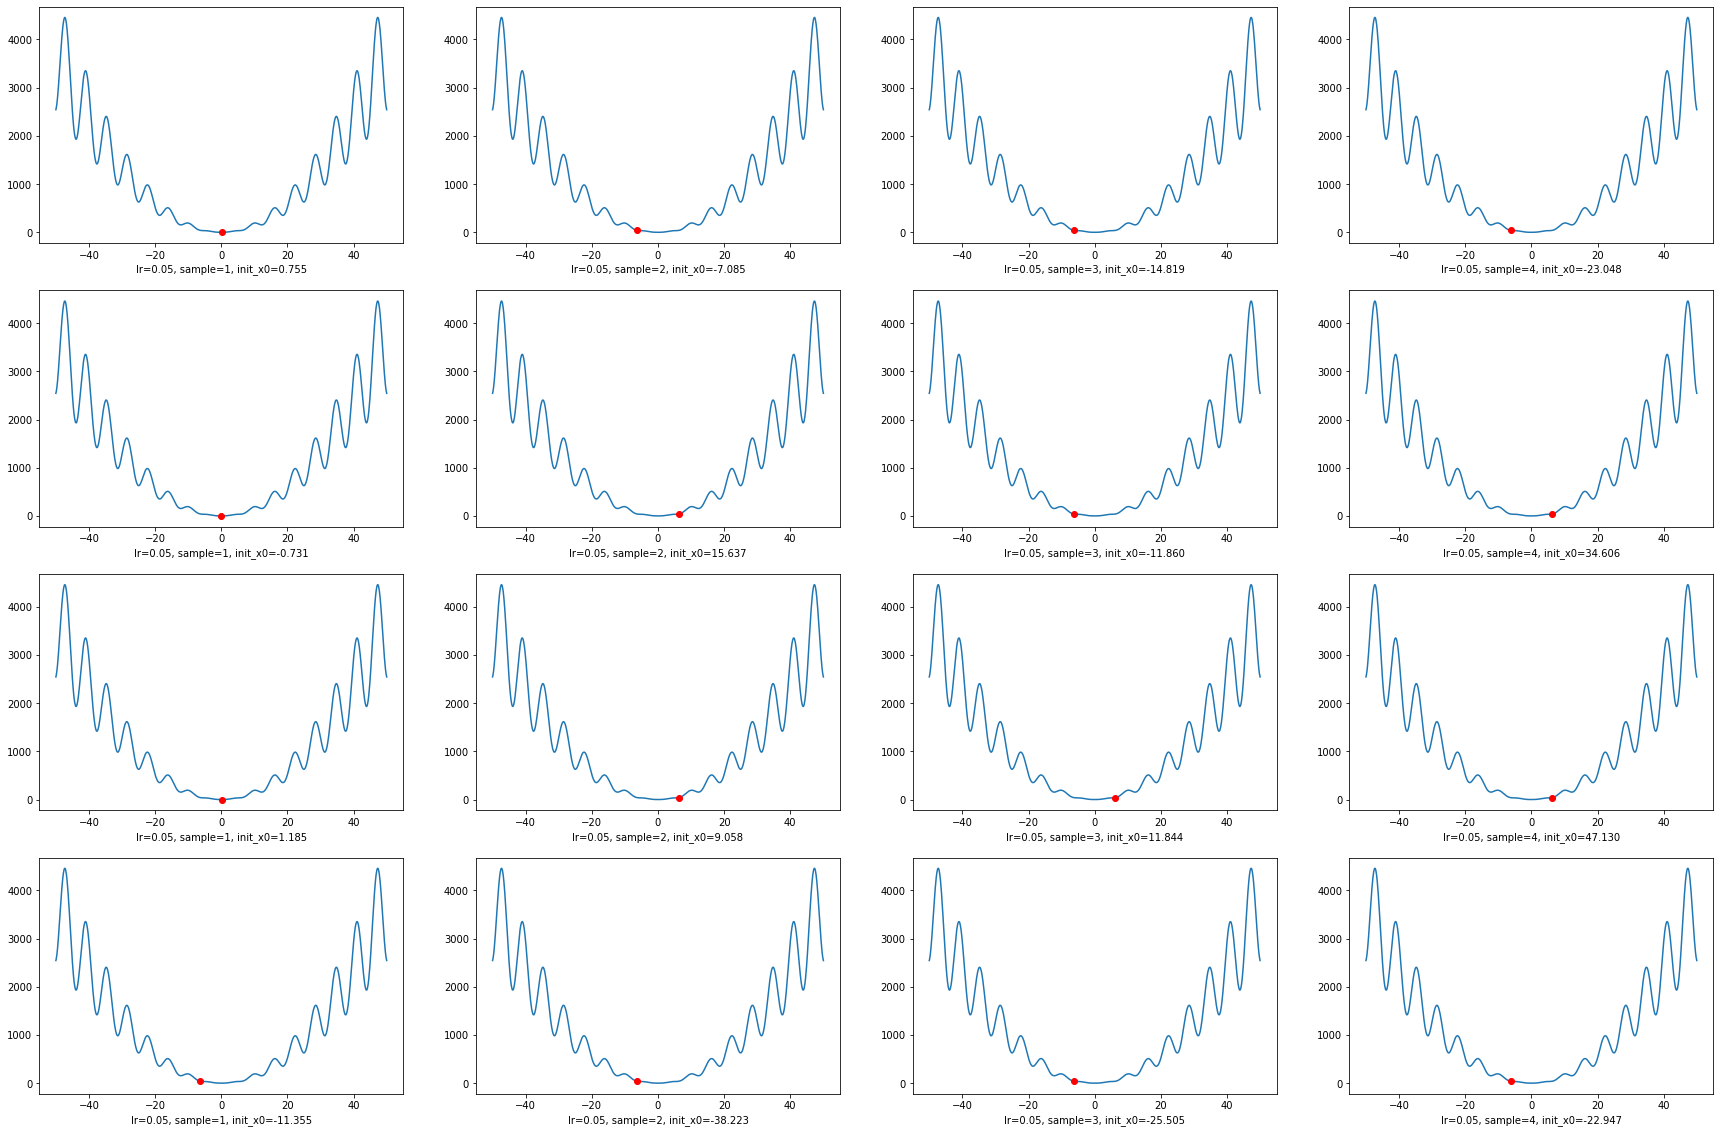

In [9]:
iters = 1000
lr = 1e-1

opt = optimizer(f=func, grad_func=gradient)

fig = plt.figure(figsize=(30, 20))
# plt.plot(x, func(x))

counter = 1
for lr in [0.05, 0.05, 0.05, 0.05]:
    for sample in range(1, 5):
        init_x0 = np.random.uniform(-50, 50)
        x0 = opt.optimize(iters=iters, lr=lr, x0=init_x0)

        ax = fig.add_subplot(4, 4, counter)
        ax.plot(x, func(x))
        ax.plot(x0, func(x0), 'ro')
        ax.set_xlabel(f'lr={lr}, sample={sample}, init_x0={init_x0:.3f}')
        
        counter += 1